# Connectivity Visualizations

## Connectivity plots

The connectivity plots provide a way to visualize pair-wise correlation, coherence, and connectivity measures between nodes. There are 2 types of plots, shown in the image below. Both types of plots can be generated as an animation to view changes over time or as standalone plots. 

[1) Connectivity Plot](#connectivity)             | [2) Connectivity Circle](#circle)
:-------------------------:|:-------------------------:
Lines drawn on a 2D representation of a skull![](instruction_imgs/connectivity.gif)  | Lines drawn between nodes represented in a circle ![](instruction_imgs/connectivity_circle.gif)

## General Setup
### Import required modules

In [1]:
from simpl_eeg import connectivity, eeg_objects

In [2]:
import warnings
warnings.filterwarnings('ignore')

```{note}
Please include the line below in your IDE so that the changes would be simultaneously reflected when you make a change to the python scripts.**
```

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

### Create epoched data
For additional options see [Creating EEG Objects](eeg_objects.html#intro) section.

In [5]:
experiment_folder = "../../data/927"
nth_epoch = 0

epochs = eeg_objects.Epochs(experiment_folder)
epoch = epochs.get_nth_epoch(nth_epoch)

Reading C:\Users\Yiki\Documents\UBC\MDS\Homework\capstone\simpl_eeg_capstone\data\927\fixica.fdt
Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 33 events and 2049 original time points ...
0 bad epochs dropped


<a id="connectivity"></a>
## Create a Connectivity Plot animation

### Define parameters

A detailed description of all parameters can be found in the `connectivity.animate_connectivity` docstring:

In [ ]:
help(connectivity.animate_connectivity)

In [ ]:
vmin = -1
vmax = 1
colormap = "RdBu_r"
calc_type = "correlation"
line_width = None
steps = 50
threshold = 0
show_sphere = True

In [ ]:
PAIR_OPTIONS = {
    "all_pairs": [],
    "local_anterior": "Fp1-F7, Fp2-F8, F7-C3, F4-C4, C4-F8, F3-C3",
    "local_posterior": "T5-C3, T5-O1, C3-P3, C4-P4, C4-T6, T6-O2",
    "far_coherence": "Fp1-T5, Fp2-T6, F7-T5, F7-P3, F7-O1, T5-F3, F3-P3, F4-P4, P4-F8, F8-T6, F8-O2, F4-T6",
    "prefrontal_to_frontal_and_central": "Fp1-F3, Fp1-C3, Fp2-F4, Fp2-C4",
    "occipital_to_parietal_and_central": "C3-O1, P3-O1, C4-O2, P4-O4",
    "prefrontal_to_parietal": "Fp1-P3, Fp2-P4",
    "frontal_to_occipital": "F3-O1, P4-O2",
    "prefrontal_to_occipital": "Fp1-O1, Fp2-O2"
}

# select from the PAIR_OPTIONS options above or use a custom pair.
pair_list = []  # leave as an empty list if you want all pairs

# example of referencing a pair from the list
pair_list = PAIR_OPTIONS["far_coherence"]

### Generating the animation

In [ ]:
%matplotlib inline

In [ ]:
%%capture

anim = connectivity.animate_connectivity(
    epoch,
    calc_type=calc_type,
    steps=steps,
    pair_list=pair_list,
    threshold=threshold,
    show_sphere=show_sphere,
    colormap=colormap,
    vmin=vmin,
    vmax=vmax,
    line_width=line_width,
)

from IPython.display import HTML

html_plot = anim.to_jshtml()
video = HTML(html_plot)

In [ ]:
video

### Saving the animation

#### Save as html
```python
html_file_path = "examples/connectivity.html"

html_file = open(html_file_path, "w")
html_file.write(html_plot)
html_file.close()
```

#### Save as gif
```python
gif_file_path = "examples/connectivity.gif"

# set frames per second (fps) and resolution (dpi)
anim.save(gif_file_path, fps=3, dpi=300)
```

#### Save as mp4
```python
mp4_file_path = "examples/connectivity.mp4"
anim.save(mp4_file_path, fps=3, dpi=300)
```

```{note}
If `FFMpegWriter` does not work on your computer you can save the file as a gif first and then convert it into mp4 file by running the code below.
```
```python
import moviepy.editor as mp

clip = mp.VideoFileClip(gif_file_path)
clip.write_videofile(mp4_file_path)
```

<a id="circle"></a>
## Create a Connectivity Circle animation

### Define parameters

A detailed description of all parameters can be found in the `connectivity.animate_connectivity_circle` docstring:

In [ ]:
help(connectivity.animate_connectivity_circle)

In [ ]:
vmin = -1
vmax = 1
colormap = "RdBu_r"
calc_type = "correlation"
line_width = 1
steps = 50
max_connections = 50

### Generating the animation

In [ ]:
%matplotlib notebook

In [ ]:
%%capture

anim = connectivity.animate_connectivity_circle(
    epoch,
    calc_type=calc_type,
    max_connections=max_connections,
    steps=steps,
    colormap=colormap,
    vmin=vmin,
    vmax=vmax,
    line_width=line_width,
)

from IPython.display import HTML

html_plot = anim.to_jshtml()
video = HTML(html_plot)

In [ ]:
video

### Saving the animation

#### Save as html
```python
html_file_path = "examples/connectivity_circle.html"
html_file = open(html_file_path, "w")
html_file.write(html_plot)
html_file.close()
```

#### Save as gif
```python
gif_file_path = "examples/connectivity_circle.gif"

# set frames per second (fps) and resolution (dpi)
anim.save(gif_file_path, fps=3, dpi=300)
```

#### Save as mp4
```python
mp4_file_path = "examples/connectivity_cicle.mp4"
anim.save(mp4_file_path, fps=3, dpi=300)
```

```{note}
If `FFMpegWriter` does not work on your computer you can save the file as a gif first and then convert it into mp4 file by running the code below.
```
```python
import moviepy.editor as mp

clip = mp.VideoFileClip(gif_file_path)
clip.write_videofile(mp4_file_path)
```

<a id="circle"></a>
## Create a Connectivity Plot

### Define parameters
A detailed description of all animation parameters can be found in the `connectivity.plot_connectivity` docstring:

In [6]:
help(connectivity.plot_connectivity)

Help on function plot_connectivity in module simpl_eeg.connectivity:

plot_connectivity(data, fig=None, locations=None, calc_type='correlation', pair_list=[], threshold=0, show_sphere=True, colormap='RdBu_r', vmin=None, vmax=None, line_width=None, title=None, colorbar=True, caption=None, **kwargs)
    Plot 2d EEG nodes on scalp with lines representing connectivity
    
    Args:
        data (mne.epochs.Epochs): Epoch to visualize
        fig (matplotlib.pyplot.figure, optional): Figure to plot on. Defaults to None.
        locations ([matplotlib.text.Text], optional): List of node locations. Defaults to None.
        calc_type (str): Connectivity calculation type
        pair_list ([str], optional): List of node pairs. Defaults to [], which indicates all pairs.
        threshold (int, optional): Unsigned connectivity threshold to display connection. Defaults to 0.
        show_sphere (bool, optional): Whether to show the cartoon head or not. Defaults to True.
        colormap (str, op

In [7]:
vmin = -1
vmax = 1
colormap = "RdBu_r"
calc_type = "correlation"
line_width = None
threshold = 0
show_sphere = True

In [8]:
PAIR_OPTIONS = {
    "all_pairs": [],
    "local_anterior": "Fp1-F7, Fp2-F8, F7-C3, F4-C4, C4-F8, F3-C3",
    "local_posterior": "T5-C3, T5-O1, C3-P3, C4-P4, C4-T6, T6-O2",
    "far_coherence": "Fp1-T5, Fp2-T6, F7-T5, F7-P3, F7-O1, T5-F3, F3-P3, F4-P4, P4-F8, F8-T6, F8-O2, F4-T6",
    "prefrontal_to_frontal_and_central": "Fp1-F3, Fp1-C3, Fp2-F4, Fp2-C4",
    "occipital_to_parietal_and_central": "C3-O1, P3-O1, C4-O2, P4-O4",
    "prefrontal_to_parietal": "Fp1-P3, Fp2-P4",
    "frontal_to_occipital": "F3-O1, P4-O2",
    "prefrontal_to_occipital": "Fp1-O1, Fp2-O2"
}

# select from the PAIR_OPTIONS options above or use a custom pair.
pair_list = []  # leave as an empty list if you want all pairs

# example of referencing a pair from the list
pair_list = PAIR_OPTIONS["far_coherence"]

### Generating a standalone plot

```{note}
Generating a plot will use the first frame in the epoch, so make sure to update your epoch object to contain your frame of interest. 
```

In [15]:
%%capture
plot = connectivity.plot_connectivity(
    epoch,
)

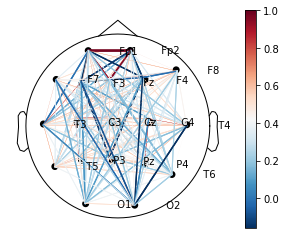

In [17]:
plot

### Saving the plot
You can change the plot to different formats by changing the format argument in the function. It supports 'png', 'pdf', 'svg'.
```python
file_path = "examples/connectivity.svg"
plot.figure.savefig(file_path)
```

</br>

<a id="circle"></a>
## Create a Connectivity Circle Plot

### Define parameters
A detailed description of all animation parameters can be found in the `connectivity.plot_conn_circle` docstring:

In [18]:
help(connectivity.plot_conn_circle)

Help on function plot_conn_circle in module simpl_eeg.connectivity:

plot_conn_circle(epoch, fig=None, calc_type='correlation', max_connections=50, ch_names=[], colormap='RdBu_r', vmin=None, vmax=None, line_width=None, title=None, colorbar=True, caption=None, **kwargs)
    Plot connectivity circle
    
    Args:
        epoch (mne.epochs.Epochs): Epoch to visualize
        fig (matplotlib.pyplot.figure, optional): Figure to plot on. Defaults to None.
        calc_type (str, optional): Connectivity calculation type. Defaults to "correlation"
        max_connections (int, optional): Maximum connections to plot. Defaults to 50.
        ch_names ([str], optional): List of channel names to display. Defaults to [], which indicates all channels.
        vmin (int, optional): The minimum for the scale. Defaults to None.
        vmin (int, optional): The maximum for the scale. Defaults to None.
        colormap (str, optional): Colour scheme to use. Defaults to "RdBu_r".
        colormap (bool,

In [19]:
vmin = -1
vmax = 1
colormap = "RdBu_r"
calc_type = "correlation"
line_width = 1
max_connections = 50

### Generating a standalone plot

```{note}
Generating a plot will use the first frame in the epoch, so make sure to update your epoch object to contain your frame of interest. 
```

In [20]:
%%capture
plot = connectivity.plot_conn_circle(
    epoch,
)

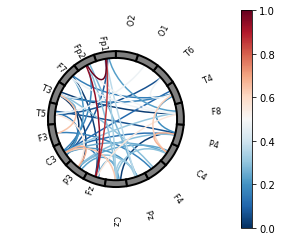

In [21]:
plot

### Saving the plot
You can change the plot to different formats by changing the format argument in the function. It supports 'png', 'pdf', 'svg'.
```python
file_path = "examples/connectivity_circle.svg"
plot.figure.savefig(file_path)
```